-Barış Aytekin

# Introduction



This project aims to create a reliable song suggestion tool for Spotify users based on their song and genre preferences. By referencing a larger data pool in which songs and their various parameters are registered, we are aiming to utilise said information(speechiness, song length, acousticness, etc. of a song) to statistically model and approximate specific tastes in music and genre, after which other relevant songs may be suggested to the user. We will measure statistics of popular genres in order to create profiles for what our users prefer(inferring user "taste" in musical genre by analysing which songs they listen to and generating suggestions based on proximity to the aforementioned user taste). 

# Part 1: Exploratory Data Analysis

# Utilized Datasets

ORIGINAL DATASETS:
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_by_year.csv

MERGED DATASETS:
https://drive.google.com/drive/folders/1R_3WOyKFi0AT1jlMrWE7z_hiF-b1U68Q?usp=sharing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

Mounted at ./drive


# Visualizations Descriptive Statistics

The visualizations in this section include scatter plots, x-y graphs, histograms and pie charts.

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
df[["popularity", "energy"]].corr()

,popularity,energy
popularity,1.000000,0.328939
energy,0.328939,1.000000


Clearly higher energy makes the songs' popularities higher due to them being positively correlated

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
df[["acousticness", "danceability"]].corr()

,acousticness,danceability
acousticness,1.000000,-0.263217
danceability,-0.263217,1.000000


For instance acousticness and danceability are negatively correlated, this'll be helpful in the next sections.

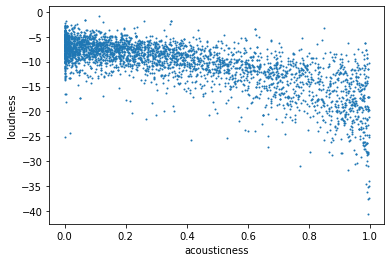

In [ ]:
df = pd.read_csv("./drive/My Drive/data_by_genres.csv")
ax = df.plot.scatter(x = "acousticness", y = "loudness", s = 1 )
ax.margins(0.05)
plt.rcParams["font.size"] = 10
plt.show()

Clearly as the acousticness of a genre increases, its loudness decreases gradually which is expected due to the nature of acoustic songs.

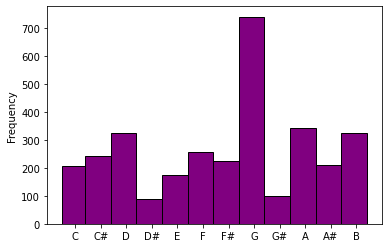

In [ ]:
df = pd.read_csv("./drive/My Drive/data_by_genres.csv")
ax = df["key"].plot.hist(bins = [0, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9], edgecolor = "black", color = "purple")
notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
plt.xticks(ticks=np.arange(0.5,12.5,1), labels = notes)
plt.show()

The most used key by the artists is G by a wide margin.

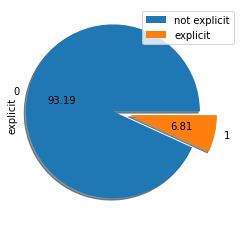

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
ex = [0.2, 0]
df["explicit"].value_counts().plot.pie(autopct='%.2f', explode = ex, shadow = 0.1)
plt.legend(labels = ["not explicit", "explicit"])
plt.show()

Majority of the songs in the dataset are not explicit.

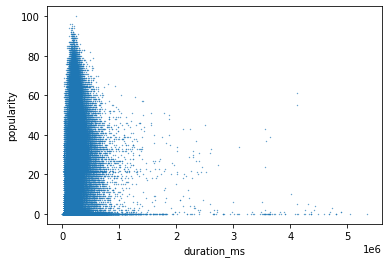

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
ax = df.plot.scatter(x = "duration_ms", y = "popularity", s= 0.1 )
plt.show()

Duration and popularity are vaguely correlated. Shorter duration does not guarantee popularity. However, the most popular songs tend to have a short-medium duration.

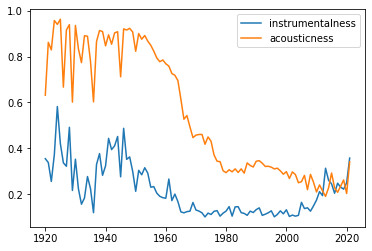

In [ ]:
df = pd.read_csv("./drive/My Drive/data_by_year.csv")
plt.plot("year", "instrumentalness", data = df)
plt.plot("year", "acousticness", data = df)
plt.legend()
plt.show()

We can clearly observe that after 1950s, music has become less acoustic which means electronic genres have been playing a bigger role. We can also see that instrumentalness and acousticness are positively correlated because both features make jumps at pretty much the same points in time.

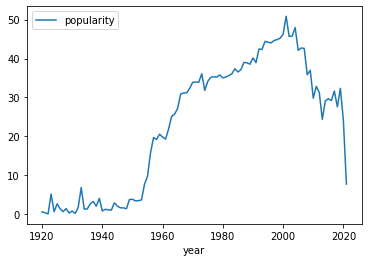

In [ ]:
df = pd.read_csv("./drive/My Drive/data_by_year.csv")
ax = df.plot(x = "year", y = "popularity")
plt.show()

Most of the popular songs on Spotify were released after the 1950s and the most popular period is 90s. There is also a noticable decline on popularity for the songs made after 90s. Also, a very sharp decline is visible for the songs made around 2020. In summary, songs published after recording technology has been advancing follow a similar increase in popularity in proportion to their recentness, with the latest songs being the exception to this popularity trend.


# Visualizations of Aggregated Forms Based on Features

Prints the most popular genres based on the number of artists in that genre.

In [ ]:
gendict = {}
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  for element in newlist:
    if element not in gendict.keys():
      gendict[element] = 1
    else:
      gendict[element] += 1
for x in gendict:
  if (gendict[x] > 400):
    print(x)


 'hip hop'
 'rap'
 'pop'
 'rock'
 'pop rap'


**Important remark**

The "biggest" genres are hip hop, rap, pop, rock and pop rap. In order to have more data avaliable, we will focus on the analysis of these major genres. We will be using acousticness, danceability and speechiness as an identifier of a specific genre and estimate how close a single song may be to any of these 5 genres using that specific song's metrics and the genre's metrics.

##POP

Find all "pop" entries and construct a dataframe.

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'pop'" not in newlist) and (" 'pop'" not in newlist) and ("'pop' " not in newlist):
    df2= df2.drop(i)

df2.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,0.242886,0.635167,221239.415835,0.640777,0.050335,0.177659,-6.772372,0.085722,119.971348,0.484560,55.382562,5.517182,0.714777,20.376289
std,0.227142,0.105933,49265.736078,0.164080,0.158463,0.093308,2.348708,0.060897,18.841472,0.167687,19.649137,3.537196,0.451909,37.810256
min,0.000017,0.207000,52867.000000,0.136000,0.000000,0.028200,-18.812500,0.023500,59.895000,0.037600,0.000000,0.000000,0.000000,1.000000
25%,0.073841,0.569250,196707.000000,0.531285,0.000001,0.118500,-7.793607,0.046482,109.208200,0.373808,50.065217,2.000000,0.000000,3.000000
50%,0.171442,0.637500,215411.671642,0.654917,0.000062,0.160417,-6.353341,0.066177,119.999500,0.485500,61.032731,6.000000,1.000000,8.000000
75%,0.351273,0.703950,238834.272959,0.759175,0.006891,0.209865,-5.204908,0.098485,129.068643,0.598073,68.000000,8.000000,1.000000,20.000000
max,0.995500,0.958000,526626.000000,0.977000,0.925000,0.817000,0.781000,0.387000,202.510000,0.978000,85.500000,11.000000,1.000000,443.000000


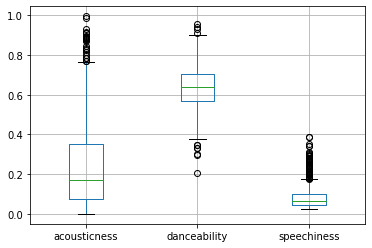

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'pop'" not in newlist) and (" 'pop'" not in newlist) and ("'pop' " not in newlist):
    df2= df2.drop(i)
df2.boxplot(column = ["acousticness", "danceability", "speechiness"])


Pop can be summarised as low acousticness, high danceability and extremely low speechiness.

##ROCK

Find all "rock" entries and construct a dataframe.

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'rock'" not in newlist) and (" 'rock'" not in newlist) and ("'rock' " not in newlist):
    df2= df2.drop(i)

df2.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.170086,0.506087,251757.423048,0.696779,0.101688,0.212957,-8.454663,0.065461,124.131271,0.519697,41.174270,5.449251,0.883527,76.916805
std,0.178093,0.110370,57483.327525,0.149769,0.158899,0.091312,2.981792,0.057691,15.843689,0.157746,14.166264,3.406538,0.321058,122.192634
min,0.000028,0.173000,84161.800000,0.123000,0.000000,0.036400,-20.229870,0.027500,71.436000,0.040400,0.000000,0.000000,0.000000,1.000000
25%,0.036465,0.441000,215754.092308,0.609600,0.003512,0.158114,-10.454432,0.041509,116.571250,0.413833,34.333333,2.000000,1.000000,8.000000
50%,0.114550,0.500500,244555.808511,0.707545,0.040238,0.201352,-8.218000,0.051302,124.145296,0.523414,40.703704,6.000000,1.000000,36.000000
75%,0.248413,0.566030,275733.360000,0.803762,0.123039,0.250168,-6.102000,0.067897,131.053800,0.631571,50.222222,9.000000,1.000000,94.000000
max,0.995500,0.860000,532542.000000,0.998000,0.905000,0.813500,-2.182000,0.955000,199.001000,0.977000,75.333333,11.000000,1.000000,929.000000


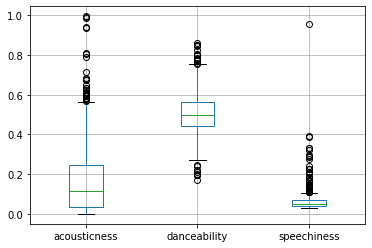

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'rock'" not in newlist) and (" 'rock'" not in newlist) and ("'rock' " not in newlist):
    df2= df2.drop(i)
df2.boxplot(column = ["acousticness", "danceability", "speechiness"])

Rock can be summarised as low acousticness, medium danceability, low speechiness.

## HIP HOP

Find all "hip hop" entries and construct a dataframe.

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'hip hop'" not in newlist) and (" 'hip hop'" not in newlist) and ("'hip hop' " not in newlist):
    df2= df2.drop(i)

df2.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,0.146917,0.726123,252423.652282,0.668237,0.041426,0.215849,-7.661150,0.213407,112.780294,0.580686,47.569760,5.749487,0.642710,24.203285
std,0.133183,0.100849,49340.137370,0.124455,0.147470,0.117445,2.469719,0.092712,17.757124,0.150931,14.568941,3.836536,0.479694,41.386984
min,0.000034,0.079800,80560.000000,0.146000,0.000000,0.035500,-19.552000,0.026900,69.752000,0.050600,0.000000,0.000000,0.000000,1.000000
25%,0.060154,0.675897,229809.656044,0.595860,0.000003,0.146406,-8.889607,0.147509,99.415750,0.487504,41.071739,1.000000,0.000000,4.000000
50%,0.117000,0.733364,251373.000000,0.674250,0.000154,0.189000,-7.198733,0.219248,110.580462,0.599500,48.600000,7.000000,1.000000,11.000000
75%,0.195790,0.796850,272064.283333,0.740404,0.005271,0.256753,-5.968333,0.274613,122.755236,0.676811,57.666667,9.000000,1.000000,26.000000
max,0.993500,0.943000,539121.444444,0.979000,0.954000,0.970000,-2.434000,0.566333,182.418000,0.978000,73.000000,11.000000,1.000000,391.000000


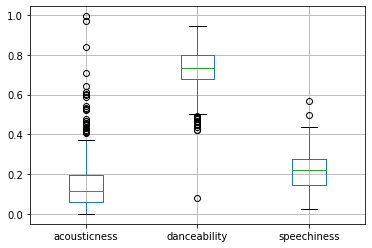

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'hip hop'" not in newlist) and (" 'hip hop'" not in newlist) and ("'hip hop' " not in newlist):
    df2= df2.drop(i)
df2.boxplot(column = ["instrumentalness", "danceability", "speechiness"])

Hip hop can be summarised as low acousticness, high danceability and moderate speechiness.

##POP RAP

Find all "pop rap" entries and construct a dataframe.

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'pop rap'" not in newlist) and (" 'pop rap'" not in newlist) and ("'pop rap' " not in newlist):
    df2= df2.drop(i)

df2.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,0.153291,0.707763,238738.686519,0.671679,0.031609,0.201138,-6.520147,0.161206,119.400644,0.541932,52.201341,5.399568,0.650108,19.399568
std,0.145472,0.108878,46977.359110,0.125860,0.132779,0.115455,2.063651,0.091198,19.978837,0.165332,16.681500,3.766186,0.477452,33.291936
min,0.000003,0.207000,73844.000000,0.146000,0.000000,0.039000,-17.848000,0.023500,69.752000,0.037600,0.000000,0.000000,0.000000,1.000000
25%,0.056560,0.649222,210297.833333,0.600700,0.000000,0.128287,-7.249000,0.084917,107.242145,0.444976,47.148810,1.000000,0.000000,3.000000
50%,0.114641,0.719000,237480.000000,0.677000,0.000016,0.179500,-6.173214,0.154000,119.907130,0.549000,55.000000,6.000000,1.000000,9.000000
75%,0.203557,0.784768,261228.104167,0.745916,0.000636,0.235571,-5.253071,0.219056,129.974000,0.649367,63.000000,9.000000,1.000000,22.000000
max,0.968000,0.925000,536571.000000,0.979000,0.954000,0.951000,-1.803000,0.501000,202.510000,0.976000,80.222222,11.000000,1.000000,391.000000


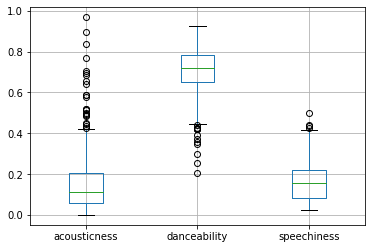

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'pop rap'" not in newlist) and (" 'pop rap'" not in newlist) and ("'pop rap' " not in newlist):
    df2= df2.drop(i)
df2.boxplot(column = ["instrumentalness", "danceability", "speechiness"])

Pop rap can be summarised as moderate acousticness, high danceability and moderate speechiness.

##RAP

Find all "rap" entries and construct a dataframe.

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'rap'" not in newlist) and (" 'rap'" not in newlist) and ("'rap' " not in newlist):
    df2= df2.drop(i)

df2.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,498.000000,498.000000,498.000000,498.000000,4.980000e+02,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.141598,0.726979,242502.792023,0.667925,3.321085e-02,0.204599,-7.178198,0.203662,117.067198,0.551851,50.931698,5.518072,0.660643,25.512048
std,0.124712,0.106921,52195.366054,0.110959,1.341204e-01,0.110760,2.281283,0.096562,18.308887,0.156655,16.547101,3.826819,0.473967,43.605475
min,0.000031,0.207000,73844.000000,0.146000,0.000000e+00,0.029500,-19.552000,0.026900,75.286000,0.050600,0.000000,0.000000,0.000000,1.000000
25%,0.054740,0.667156,215280.213445,0.603761,6.115000e-07,0.137943,-8.095667,0.132605,104.740183,0.448000,43.456294,1.000000,0.000000,4.000000
50%,0.109874,0.736833,243280.810811,0.666907,6.063889e-05,0.181806,-6.829562,0.206887,116.694294,0.560258,52.951754,6.000000,1.000000,11.000000
75%,0.197300,0.802086,266536.882017,0.729679,2.683355e-03,0.236213,-5.686640,0.265845,128.572864,0.658010,62.066667,9.000000,1.000000,26.000000
max,0.838000,0.965000,539121.444444,0.979000,9.540000e-01,0.970000,-1.803000,0.728000,202.510000,0.964000,84.000000,11.000000,1.000000,391.000000


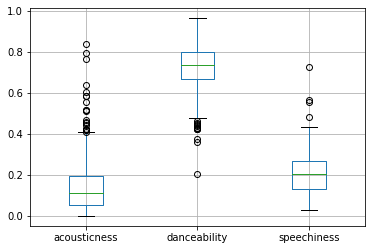

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'rap'" not in newlist) and (" 'rap'" not in newlist) and ("'rap' " not in newlist):
    df2= df2.drop(i)
df2.boxplot(column = ["instrumentalness", "danceability", "speechiness"])

Rap can be summarised as low acousticness, high danceability and moderate speechiness.

# Analysis of the Most Popular Artists and Songs

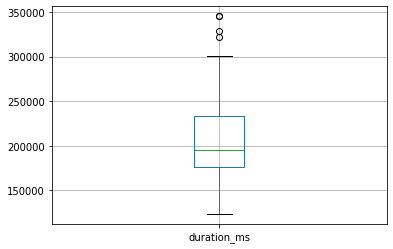

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df = df[df["popularity"] > 80]
df.boxplot(column = ["duration_ms"])

The most popular songs are concentrated between 3 and 4 minutes.

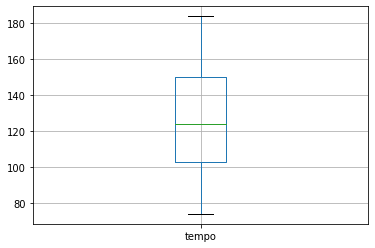

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df = df[df["popularity"] > 80]
df.boxplot(column = ["tempo"])

Medium tempo(~125 beats per minute) seems to be the best spot for popularity, with tempos further away from this mean not being as popular. Popular songs below 100 bpm and above 150 bpm are uncommon.

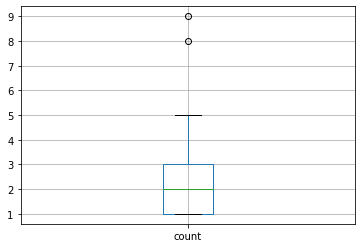

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df = df[df["popularity"] > 80]
df.boxplot(column = ["count"])

Most popular songs are in a pulse of 2 beats

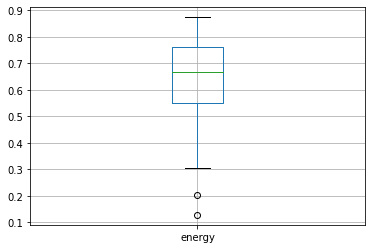

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df = df[df["popularity"] > 80]
df.boxplot(column = ["energy"])

Most popular songs have an energy level over 0.55 with a median around 0.68

<BarContainer object of 67 artists>

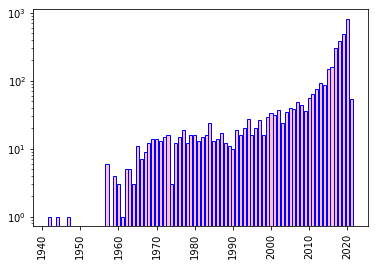

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
df = df[df["popularity"] > 70]
plt.xticks(rotation='vertical')
plt.rcParams["font.size"] = 10
gendict = {}
for i in range(df.shape[0]):
  newstr = df.iloc[i, 14][0:4]
  if int(newstr) not in gendict.keys():
      gendict[int(newstr)] = 1
  else:
      gendict[int(newstr)] += 1
    

plt.bar(gendict.keys(), gendict.values(), color='pink', width = 0.8, edgecolor = "blue", log = True)


Using a lower popularity threshold to catch relevant songs from certain years, we can see that there is an increase in terms of popular songs per year. We decided to implement a logarithmic scale in order to show the exponential-like growth more clearly.

# How Songs of Different Genres Change Over Time

## Linking genres to features and years

In this section we've created our own .csv files for each of the 5 genres we've analysed containing their features, years and genre types in the columns simultaneously. In the original Kaggle files these three are not included at the same time but we've merged the data.csv and data_w_genres.csv in order to analyse temporal behaviour feasibly. (We've only taken artists with popularity > 60 since the execution time of the merging is too long)

In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'pop'" not in newlist) and (" 'pop'" not in newlist) and ("'pop' " not in newlist):
    df2= df2.drop(i)
df2.to_csv('pop.csv', index = False)
!cp pop.csv "drive/My Drive/"


In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
df2 = pd.read_csv("./drive/My Drive/pop.csv")
df = df[df["popularity"] > 60 ]
df = df.reset_index()
df["genres"] = np.NaN
for i in range(df.shape[0]):
  data1 = df.iloc[i,2].strip("]")
  data1 = data1.strip("[")
  data1 = data1.strip("\"")
  data1 = data1.strip("'")
  for j in range(df2.shape[0]):
    data2 = df2.iloc[j,0].strip("]")
    data2 = data2.strip("[")
    data2 = data2.strip("\"")
    data2 = data2.strip("'")
    if data1 == data2 :
      df.iloc[i,20] = df2.iloc[j,15]
      break
df = df[df['genres'].notna()]

df.to_csv('popfinal.csv')
!cp popfinal.csv "drive/My Drive/"




In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'rock'" not in newlist) and (" 'rock'" not in newlist) and ("'rock' " not in newlist):
    df2= df2.drop(i)
df2.to_csv('rock.csv', index = False)
!cp rock.csv "drive/My Drive/"


In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
df2 = pd.read_csv("./drive/My Drive/rock.csv")
df = df[df["popularity"] > 60 ]
df = df.reset_index()
df["genres"] = np.NaN
for i in range(df.shape[0]):
  data1 = df.iloc[i,2].strip("]")
  data1 = data1.strip("[")
  data1 = data1.strip("\"")
  data1 = data1.strip("'")
  for j in range(df2.shape[0]):
    data2 = df2.iloc[j,0].strip("]")
    data2 = data2.strip("[")
    data2 = data2.strip("\"")
    data2 = data2.strip("'")
    if data1 == data2 :
      df.iloc[i,20] = df2.iloc[j,15]
      break
df = df[df['genres'].notna()]

df.to_csv('rockfinal.csv')
!cp rockfinal.csv "drive/My Drive/"




In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'hip hop'" not in newlist) and (" 'hip hop'" not in newlist) and ("'hip hop' " not in newlist):
    df2= df2.drop(i)
df2.to_csv('hip_hop.csv', index = False)
!cp hip_hop.csv "drive/My Drive/"


In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
df2 = pd.read_csv("./drive/My Drive/hip_hop.csv")
df = df[df["popularity"] > 60 ]
df = df.reset_index()
df["genres"] = np.NaN
for i in range(df.shape[0]):
  data1 = df.iloc[i,2].strip("]")
  data1 = data1.strip("[")
  data1 = data1.strip("\"")
  data1 = data1.strip("'")
  for j in range(df2.shape[0]):
    data2 = df2.iloc[j,0].strip("]")
    data2 = data2.strip("[")
    data2 = data2.strip("\"")
    data2 = data2.strip("'")
    if data1 == data2 :
      df.iloc[i,20] = df2.iloc[j,15]
      break
df = df[df['genres'].notna()]

df.to_csv('hip_hopfinal.csv')
!cp hip_hopfinal.csv "drive/My Drive/"




In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'pop rap'" not in newlist) and (" 'pop rap'" not in newlist) and ("'pop rap' " not in newlist):
    df2= df2.drop(i)
df2.to_csv('pop_rap.csv', index = False)
!cp pop_rap.csv "drive/My Drive/"

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
df2 = pd.read_csv("./drive/My Drive/pop_rap.csv")
df = df[df["popularity"] > 60 ]
df = df.reset_index()
df["genres"] = np.NaN
for i in range(df.shape[0]):
  data1 = df.iloc[i,2].strip("]")
  data1 = data1.strip("[")
  data1 = data1.strip("\"")
  data1 = data1.strip("'")
  for j in range(df2.shape[0]):
    data2 = df2.iloc[j,0].strip("]")
    data2 = data2.strip("[")
    data2 = data2.strip("\"")
    data2 = data2.strip("'")
    if data1 == data2 :
      df.iloc[i,20] = df2.iloc[j,15]
      break
df = df[df['genres'].notna()]

df.to_csv('pop_rapfinal.csv')
!cp pop_rapfinal.csv "drive/My Drive/"




In [ ]:
df = pd.read_csv("./drive/My Drive/data_w_genres.csv")
df2 = df.copy()
for i in range(df.shape[0]):
  newstr = df.iloc[i, 15][1:-1]
  newlist = newstr.split(",")
  if ("'rap'" not in newlist) and (" 'rap'" not in newlist) and ("'rap' " not in newlist):
    df2= df2.drop(i)
df2.to_csv('rap.csv', index = False)
!cp rap.csv "drive/My Drive/"

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
df2 = pd.read_csv("./drive/My Drive/rap.csv")
df = df[df["popularity"] > 60 ]
df = df.reset_index()
df["genres"] = np.NaN
for i in range(df.shape[0]):
  data1 = df.iloc[i,2].strip("]")
  data1 = data1.strip("[")
  data1 = data1.strip("\"")
  data1 = data1.strip("'")
  for j in range(df2.shape[0]):
    data2 = df2.iloc[j,0].strip("]")
    data2 = data2.strip("[")
    data2 = data2.strip("\"")
    data2 = data2.strip("'")
    if data1 == data2 :
      df.iloc[i,20] = df2.iloc[j,15]
      break
df = df[df['genres'].notna()]

df.to_csv('rapfinal.csv')
!cp rapfinal.csv "drive/My Drive/"




## Graphs of Features Over Time Based on Genre

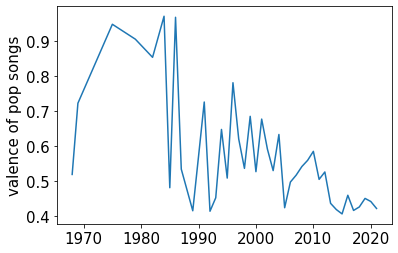

In [ ]:
df = pd.read_csv("./drive/My Drive/popfinal.csv")
gendict = {}
ind = 19
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items())

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("valence of pop songs")
plt.plot(x, y)
plt.show()

Valence of pop songs has been decreasing.

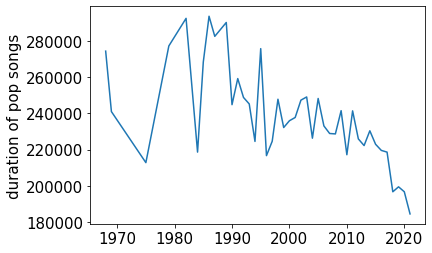

In [ ]:
df = pd.read_csv("./drive/My Drive/popfinal.csv")
gendict = {}
ind = 5
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items())

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("duration of pop songs")
plt.plot(x, y)
plt.show()

Pop song duration has been decreasing.

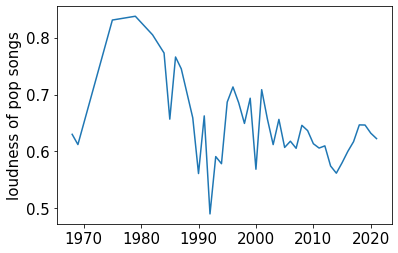

In [ ]:
df = pd.read_csv("./drive/My Drive/popfinal.csv")
gendict = {}
ind = 4
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items()) 

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("loudness of pop songs")
plt.plot(x, y)
plt.show()

Pop song volume has been decreasing.

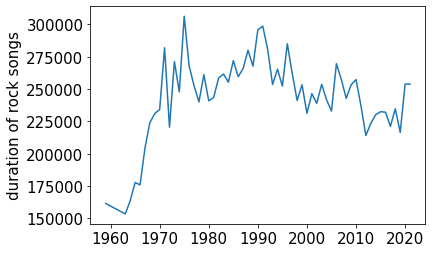

In [ ]:
df = pd.read_csv("./drive/My Drive/rockfinal.csv")
gendict = {}
ind = 5
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items()) 

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("duration of rock songs")
plt.plot(x, y)
plt.show()

Rock song duration has increased considerably form its starting point.

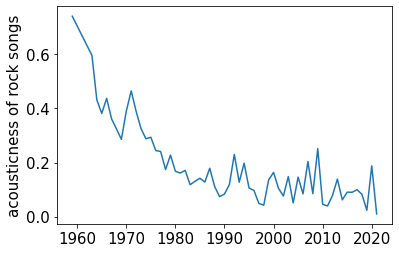

In [ ]:
df = pd.read_csv("./drive/My Drive/rockfinal.csv")
gendict = {}
ind = 2
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items()) 

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("acousticness of rock songs")
plt.plot(x, y)
plt.show()

Acousticness of rock songs has been decreasing.

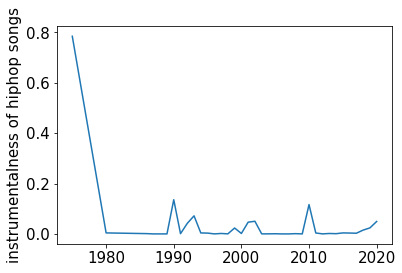

In [ ]:
df = pd.read_csv("./drive/My Drive/hip_hopfinal.csv")
gendict = {}
ind = 9
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items()) 

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("instrumentalness of hiphop songs")
plt.plot(x, y)
plt.show()

Hip hop songs were very low instrumentality since 1980. The previous period is indicative of how sampling sounds started and instrumentality became less and less of a defining genre trait for hip hop.

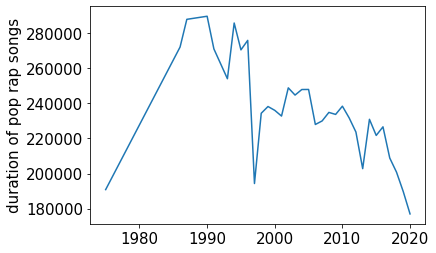

In [ ]:
df = pd.read_csv("./drive/My Drive/pop_rapfinal.csv")
gendict = {}
ind = 5
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items())

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("duration of pop rap songs")
plt.plot(x, y)
plt.show()

Pop rap song durations have been between 180 and 280 seconds. It must be noted that there has been a recent trend of lower duration songs.

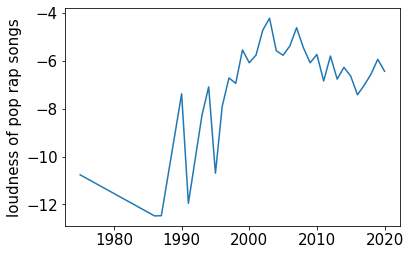

In [ ]:
df = pd.read_csv("./drive/My Drive/pop_rapfinal.csv")
gendict = {}
ind = 12
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items())

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("loudness of pop rap songs")
plt.plot(x, y)
plt.show()

Pop rap songs became loud near the 2000's and have plateaued at the same level of loudness ever since.

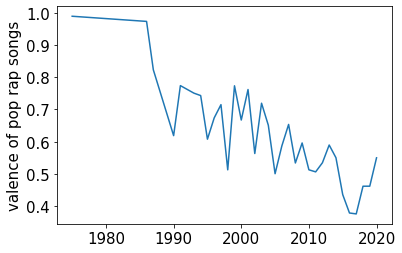

In [ ]:
df = pd.read_csv("./drive/My Drive/pop_rapfinal.csv")
gendict = {}
ind = 19
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items()) 

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("valence of pop rap songs")
plt.plot(x, y)
plt.show()

Pop rap songs have been becoming more and more negative(lower valence signifies less positive emotions conveyed in a song, gloominess and depression are associated with low valence songs for example).

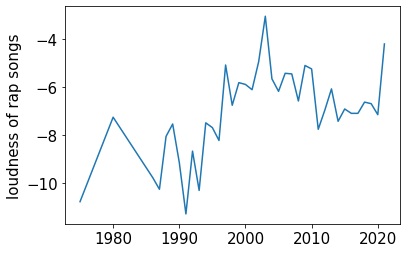

In [ ]:
df = pd.read_csv("./drive/My Drive/rapfinal.csv")
gendict = {}
ind = 12
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items()) 

x, y = zip(*lists)
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("loudness of rap songs")
plt.plot(x, y)
plt.show()

Rap songs have been on a quick climb to higher decibel ranges since the 90's.

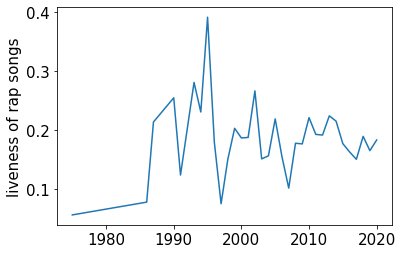

In [ ]:
df = pd.read_csv("./drive/My Drive/pop_rapfinal.csv")
gendict = {}
ind = 11
for i in range(df.shape[0]):
  feat = df.iloc[i, ind]
  if df.iloc[i,20] not in gendict.keys():
      gendict[df.iloc[i,20]] = [df.iloc[i,ind], 1, df.iloc[i,ind]]
  else:
      gendict[df.iloc[i,20]][0] += df.iloc[i,ind]
      gendict[df.iloc[i,20]][1] += 1
      gendict[df.iloc[i,20]][2] = gendict[df.iloc[i,20]][0] / gendict[df.iloc[i,20]][1]

for j in gendict.keys():
  gendict[j]=gendict[j][2]
lists = sorted(gendict.items()) 

x, y = zip(*lists) 
plt.rcParams["font.size"] = 15
ax = plt.figure().add_subplot(111)
ax.set_ylabel("liveness of rap songs")
plt.plot(x, y)
plt.show()

Rap songs have always had very low liveness(higher beat quantisation and recordings unlike live performances).

# Part 2: Hypothesis Testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import special
from os.path import join
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

Mounted at ./drive


# How features affect the popularity


Hypothesis Test: We'd like to know whether the popular songs have a higher energy than the average.

**Null Hypothesis ($H_0$)**: The energy level of the most popular songs are equal to the average.

$ H_0: \mu_{popular} = \mu$

**Alternative Hypothesis ($H_A$)**: The energy level of the most popular songs are higher than the average.

$ H_A:\mu_{popular} > \mu$

**Significance level**: 0.05

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
feature = "energy"
s_mean = df[df["popularity"] > 80][feature].mean()
p_mean = df[feature].mean()
std = df[df["popularity"] > 80][feature].std()
size = df[df["popularity"] > 80][feature].count()
z = (s_mean - p_mean)/(std/(size**0.5))
print("Standard error is", std/(size**0.5), "\nSample mean is", s_mean,"\nSample standard deviation is", std,"\nSample size is", size,"\nPopulation mean is", p_mean,"\nZ test statistic is", z)

Standard error is 0.007884764773496903 
Sample mean is 0.6046080590717301 
Sample standard deviation is 0.17166347999158416 
Sample size is 474 
Population mean is 0.4827208433255605 
Z test statistic is 15.458573495542911


p-value is 3.302248806996807e-54


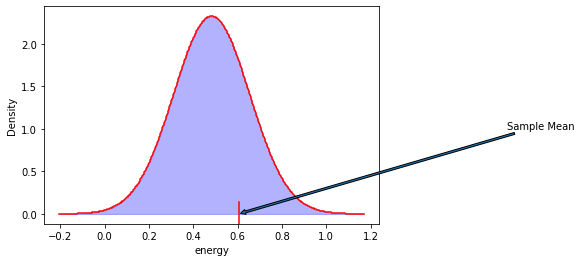

In [ ]:
offset = 4*std
x = np.linspace(p_mean - offset, p_mean + offset, size)
y = stats.norm.pdf(x, p_mean, std)
plt.plot(x,y, color = "red", snap = True)
plt.axvline(s_mean, ymax=0.1, color="red")
plt.annotate(
    "Sample Mean", 
    xy=(s_mean, 0), 
    xytext=(3*s_mean, 1), 
    arrowprops={"arrowstyle": "simple"})
plt.xlabel(feature)
plt.ylabel("Density")
plt.fill_between(x, y, alpha=0.3, color='b')
p_value = stats.norm.cdf(-z) 
print("p-value is", p_value)

Since the p value is smaller than the significance level of 0.05, we reject the null hypothesis. So, indeed the energy level of popular songs are higher than the average.
*****************************

Hypothesis Test: We'd like to know whether the popular songs have a higher speechiness than average.

**Null Hypothesis ($H_0$)**: The speechiness level of the most popular songs is equal to the average

$ H_0: \mu_{popular} = \mu$

**Alternative Hypothesis ($H_A$)**: The speechines level of the most popular songs is higher than the average

$ H_A:\mu_{popular} > \mu$

**Significance level**: 0.05

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
feature = "speechiness"
s_mean = df[df["popularity"] > 80][feature].mean()
p_mean = df[feature].mean()
std = df[df["popularity"] > 80][feature].std()
size = df[df["popularity"] > 80][feature].count()
z = (s_mean - p_mean)/(std/(size**0.5))
print("Standard error is", std/(size**0.5), "\nSample mean is", s_mean,"\nSample standard deviation is", std,"\nSample size is", size,"\nPopulation mean is", p_mean,"\nZ test statistic is", z)

Standard error is 0.004605141967948244 
Sample mean is 0.10674156118143466 
Sample standard deviation is 0.10026103742885469 
Sample size is 474 
Population mean is 0.10572918360676538 
Z test statistic is 0.21983634418122613


p-value is 0.41299930668974405


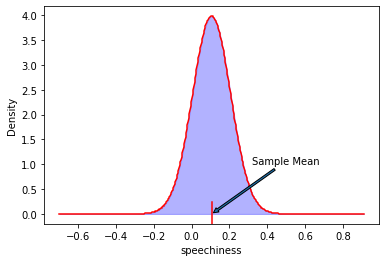

In [ ]:
offset = 8*std
x = np.linspace(p_mean - offset, p_mean + offset, size)
y = stats.norm.pdf(x, p_mean, std)
plt.plot(x,y, color = "red", snap = True)
plt.axvline(s_mean, ymax=0.1, color="red")
plt.annotate(
    "Sample Mean", 
    xy=(s_mean, 0), 
    xytext=(3*s_mean, 1), 
    arrowprops={"arrowstyle": "simple"})
plt.xlabel(feature)
plt.ylabel("Density")
plt.fill_between(x, y, alpha=0.3, color='b')
p_value = stats.norm.cdf(-z) 
print("p-value is", p_value)

Since the p value is bigger than the significance level of 0.05, we fail to reject the null hypothesis. So, indeed the speechines level of popular songs are pretty much the same with the rest.
********************************

Hypothesis Test: We'd like to know whether the popular songs have a higher danceability than average.

**Null Hypothesis ($H_0$)**: The danceability of the most popular songs is equal to the average

$ H_0: \mu_{popular} = \mu$

**Alternative Hypothesis ($H_A$)**: The danceability of the most popular songs is higher than the average

$ H_A:\mu_{popular} > \mu$

**Significance level**: 0.05

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
feature = "danceability"
s_mean = df[df["popularity"] > 80][feature].mean()
p_mean = df[feature].mean()
std = df[df["popularity"] > 80][feature].std()
size = df[df["popularity"] > 80][feature].count()
z = (s_mean - p_mean)/(std/(size**0.5))
print("Standard error is", std/(size**0.5), "\nSample mean is", s_mean,"\nSample standard deviation is", std,"\nSample size is", size,"\nPopulation mean is", p_mean,"\nZ test statistic is", z)

Standard error is 0.006702171380108648 
Sample mean is 0.6825189873417721 
Sample standard deviation is 0.14591659937360346 
Sample size is 474 
Population mean is 0.5367575873478169 
Z test statistic is 21.748384475300046


p-value is 3.57777096416677e-105


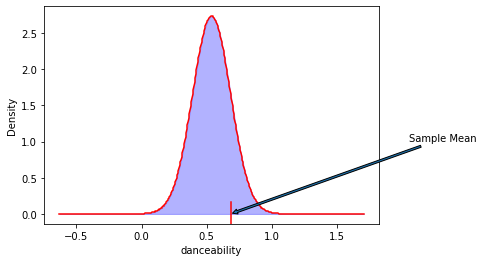

In [ ]:
offset = 8*std
x = np.linspace(p_mean - offset, p_mean + offset, size)
y = stats.norm.pdf(x, p_mean, std)
plt.plot(x,y, color = "red", snap = True)
plt.axvline(s_mean, ymax=0.1, color="red")
plt.annotate(
    "Sample Mean", 
    xy=(s_mean, 0), 
    xytext=(3*s_mean, 1), 
    arrowprops={"arrowstyle": "simple"})
plt.xlabel(feature)
plt.ylabel("Density")
plt.fill_between(x, y, alpha=0.3, color='b')
p_value = stats.norm.cdf(-z) 
print("p-value is", p_value)

Since the p value is smaller than the significance level of 0.05, we reject the null hypothesis. So indeed the danceability of popular songs are bigger than the average.
*******************************

Hypothesis Test: We'd like to know whether the popular songs have a higher liveness than average.

**Null Hypothesis ($H_0$)**: The liveness of the most popular songs is equal to the average

$ H_0: \mu_{popular} = \mu$

**Alternative Hypothesis ($H_A$)**: The liveness of the most popular songs is less than the average

$ H_A:\mu_{popular} < \mu$

**Significance level**: 0.05

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
feature = "liveness"
s_mean = df[df["popularity"] > 80][feature].mean()
p_mean = df[feature].mean()
std = df[df["popularity"] > 80][feature].std()
size = df[df["popularity"] > 80][feature].count()
z = (s_mean - p_mean)/(std/(size**0.5))
print("Standard error is", std/(size**0.5), "\nSample mean is", s_mean,"\nSample standard deviation is", std,"\nSample size is", size,"\nPopulation mean is", p_mean,"\nZ test statistic is", z)

Standard error is 0.005571652599579928 
Sample mean is 0.16567805907172986 
Sample standard deviation is 0.12130346332752553 
Sample size is 474 
Population mean is 0.2111231446364156 
Z test statistic is -8.15648225593104


p-value is 1.7246157737928787e-16


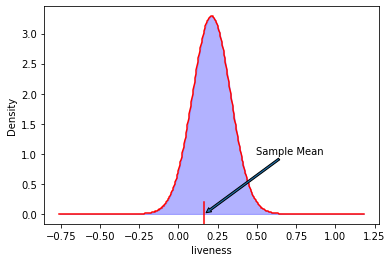

In [ ]:
offset = 8*std
x = np.linspace(p_mean - offset, p_mean + offset, size)
y = stats.norm.pdf(x, p_mean, std)
plt.plot(x,y, color = "red", snap = True)
plt.axvline(s_mean, ymax=0.1, color="red")
plt.annotate(
    "Sample Mean", 
    xy=(s_mean, 0), 
    xytext=(3*s_mean, 1), 
    arrowprops={"arrowstyle": "simple"})
plt.xlabel(feature)
plt.ylabel("Density")
plt.fill_between(x, y, alpha=0.3, color='b')
p_value = stats.norm.cdf(z) 
print("p-value is", p_value)

Since the p value is smaller than the significance level of 0.05, we reject the null hypothesis. So the liveness of popular songs are smaller than the average.
**************************

Hypothesis Test: We'd like to know whether the popular songs have a smaller acousticness than average.

**Null Hypothesis ($H_0$)**: The acousticness of the most popular songs is equal to the average

$ H_0: \mu_{popular} = \mu$

**Alternative Hypothesis ($H_A$)**: The acousticness of the most popular songs is less than the average

$ H_A:\mu_{popular} < \mu$

**Significance level**: 0.05

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
feature = "acousticness"
s_mean = df[df["popularity"] > 80][feature].mean()
p_mean = df[feature].mean()
std = df[df["popularity"] > 80][feature].std()
size = df[df["popularity"] > 80][feature].count()
z = (s_mean - p_mean)/(std/(size**0.5))
print("Standard error is", std/(size**0.5), "\nSample mean is", s_mean,"\nSample standard deviation is", std,"\nSample size is", size,"\nPopulation mean is", p_mean,"\nZ test statistic is", z)

Standard error is 0.012356403773291686 
Sample mean is 0.26687143248945155 
Sample standard deviation is 0.2690179520680441 
Sample size is 474 
Population mean is 0.49922848176599677 
Z test statistic is -18.804585342119037


p-value is 3.463085284747716e-79


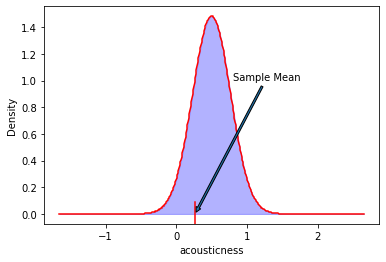

In [ ]:
offset = 8*std
x = np.linspace(p_mean - offset, p_mean + offset, size)
y = stats.norm.pdf(x, p_mean, std)
plt.plot(x,y, color = "red", snap = True)
plt.axvline(s_mean, ymax=0.1, color="red")
plt.annotate(
    "Sample Mean", 
    xy=(s_mean, 0), 
    xytext=(3*s_mean, 1), 
    arrowprops={"arrowstyle": "simple"})
plt.xlabel(feature)
plt.ylabel("Density")
plt.fill_between(x, y, alpha=0.3, color='b')
p_value = stats.norm.cdf(z) 
print("p-value is", p_value)

Since the p value is smaller than the significance level of 0.05, we reject the null hypothesis. So indeed the acousticness of popular songs are less than the average.
******************************

# Differences between the songs of same genre within different time periods

##POP

Hypothesis Test: We'd like to know whether pop songs from 80s and 90s differ by danceability

**Null Hypothesis ($H_0$)**: The danceability of pop songs from two periods are equal

$ H_0: \mu_{80s} = \mu_{90s}$

**Alternative Hypothesis ($H_A$)**: The danceability of pop songs from 80s is higher than that of the ones from 90s 

$ H_A:\mu_{80s} > \mu_{90s}$

**Significance level**: 0.05

Ttest_indResult(statistic=4.036677028882948, pvalue=0.0004802117646583894)

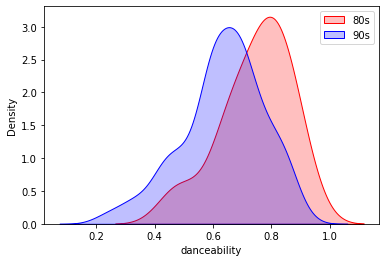

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/popfinal.csv")
per1 = "80s"
per2 = "90s"
feature = "danceability"
df1 = df[(df["year"] >= 1980) & (df["year"] < 1990)][feature]
df2 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since p value is smaller than 0.05, we reject the null hypothesis meaning that the danceability of pop songs from 80s is higher than of the ones from 90s.
*****************************

Hypothesis Test: We'd like to know whether pop songs from 00s and 90s differ by liveness

**Null Hypothesis ($H_0$)**: The liveness of pop songs from two periods are equal

$ H_0: \mu_{00s} = \mu_{90s}$

**Alternative Hypothesis ($H_A$)**: The liveness of pop songs from 00s is higher than that of the ones from 90s 

$ H_A:\mu_{00s} > \mu_{90s}$

**Significance level**: 0.05

Ttest_indResult(statistic=0.6447649667937697, pvalue=0.5201894428771991)

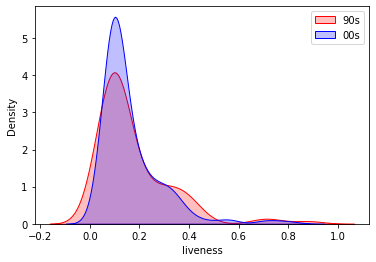

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/popfinal.csv")
per1 = "90s"
per2 = "00s"
feature = "liveness"
df1 = df[(df["year"] >= 1990) & (df["year"] < 2000)][feature]
df2 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since the p value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Liveness from two periods are roughly the same.
******************************

##ROCK

Hypothesis Test: We'd like to know whether rock songs from 00s and 90s differ by loudness

**Null Hypothesis ($H_0$)**: The loudness of rock songs from two periods are equal

$ H_0: \mu_{00s} = \mu_{90s}$

**Alternative Hypothesis ($H_A$)**: The loudness of rock songs from 00s is higher than that of the ones from 90s 

$ H_A:\mu_{00s} > \mu_{90s}$

**Significance level**: 0.05

Ttest_indResult(statistic=-6.812781100103477, pvalue=2.6967830686487917e-11)

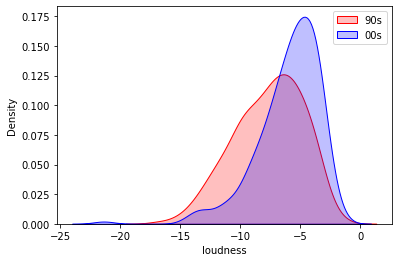

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/rockfinal.csv")
per1 = "90s"
per2 = "00s"
feature = "loudness"
df1 = df[(df["year"] >= 1990) & (df["year"] < 2000)][feature]
df2 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since the p value is less than the significance level of 0.05, we reject the null hypothesis. Loudness of the 00s are greater than 90s.
*******************

Hypothesis Test: We'd like to know whether rock songs from 00s and 70s differ by energy

**Null Hypothesis ($H_0$)**: The energy of rock songs from two periods are equal

$ H_0: \mu_{00s} = \mu_{70s}$

**Alternative Hypothesis ($H_A$)**: The energy of rock songs from 00s is higher than that of the ones from 70s 

$ H_A:\mu_{00s} > \mu_{70s}$

**Significance level**: 0.05

Ttest_indResult(statistic=-10.276485945364907, pvalue=9.567678796469765e-23)

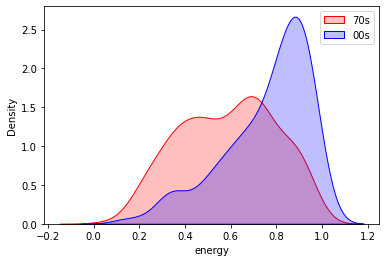

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/rockfinal.csv")
per1 = "70s"
per2 = "00s"
feature = "energy"
df1 = df[(df["year"] >= 1970) & (df["year"] < 1980)][feature]
df2 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since the p value is less than the significance level of 0.05, we reject the null hypothesis. Energy levels of the 00s are greater compared to 70s.
*******************************

##HIP HOP

Hypothesis Test: We'd like to know whether hip hop songs from 00s and 90s differ by tempo

**Null Hypothesis ($H_0$)**: The tempo of hip hop songs from two periods are equal

$ H_0: \mu_{00s} = \mu_{90s}$

**Alternative Hypothesis ($H_A$)**: The tempo of hip hop songs from 00s is higher than that of the ones from 90s 

$ H_A:\mu_{00s} > \mu_{90s}$

**Significance level**: 0.05

Ttest_indResult(statistic=-1.5149532234687655, pvalue=0.13148684442597133)

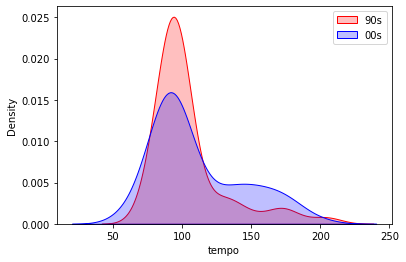

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/hip_hopfinal.csv")
per1 = "90s"
per2 = "00s"
feature = "tempo"
df1 = df[(df["year"] >= 1990) & (df["year"] < 2000)][feature]
df2 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since the p value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Tempo from two periods are roughly the same.
****************************

Hypothesis Test: We'd like to know whether hip hop songs from 00s and 90s differ by danceability

**Null Hypothesis ($H_0$)**: The danceability of hip hop songs from two periods are equal

$ H_0: \mu_{00s} = \mu_{90s}$

**Alternative Hypothesis ($H_A$)**: The danceability of hip hop songs from 00s is less than that of the ones from 90s 

$ H_A:\mu_{00s} < \mu_{90s}$

**Significance level**: 0.05

Ttest_indResult(statistic=2.054268771299598, pvalue=0.04134225064588926)

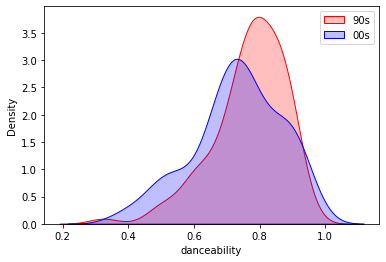

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/hip_hopfinal.csv")
per1 = "90s"
per2 = "00s"
feature = "danceability"
df1 = df[(df["year"] >= 1990) & (df["year"] < 2000)][feature]
df2 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since the p value is less than the significance level of 0.05, we reject the null hypothesis. Danceability of 00s songs is less than that of the 90s songs.
*********************************

##POP RAP

Hypothesis Test: We'd like to know whether pop rap songs from 00s and 90s differ by valence

**Null Hypothesis ($H_0$)**: The valence of pop rap songs from two periods are equal

$ H_0: \mu_{00s} = \mu_{90s}$

**Alternative Hypothesis ($H_A$)**: The valence of pop rap songs from 00s is less than that of the ones from 90s 

$ H_A:\mu_{00s} < \mu_{90s}$

**Significance level**: 0.05

Ttest_indResult(statistic=3.153976384889603, pvalue=0.0022988441546006695)

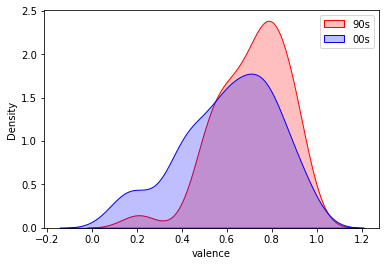

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/pop_rapfinal.csv")
per1 = "90s"
per2 = "00s"
feature = "valence"
df1 = df[(df["year"] >= 1990) & (df["year"] < 2000)][feature]
df2 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since the p value is less than the significance level of 0.05, we reject the null hypothesis. Valence of 00s songs is less than that of the 90s songs.
*********************************

Hypothesis Test: We'd like to know whether pop rap songs from 00s and 10s differ by tempo

**Null Hypothesis ($H_0$)**: The tempo of pop rap songs from two periods are equal

$ H_0: \mu_{00s} = \mu_{10s}$

**Alternative Hypothesis ($H_A$)**: The tempo of pop rap songs from 00s is less than that of the ones from 10s 

$ H_A:\mu_{00s} < \mu_{10s}$

**Significance level**: 0.05

Ttest_indResult(statistic=-1.3790557497285734, pvalue=0.16959113707054807)

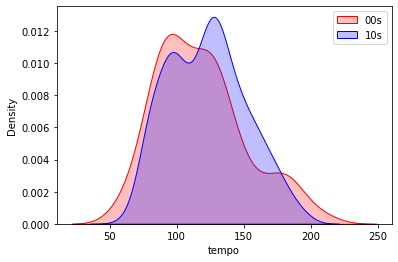

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/pop_rapfinal.csv")
per1 = "00s"
per2 = "10s"
feature = "tempo"
df1 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
df2 = df[(df["year"] >= 2010) & (df["year"] < 2020)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since the p value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Tempo is pretty much the same throughout.
*********************************

##RAP

Hypothesis Test: We'd like to know whether rap songs from 00s and 10s differ by liveness

**Null Hypothesis ($H_0$)**: The liveness of rap songs from two periods are equal

$ H_0: \mu_{00s} = \mu_{10s}$

**Alternative Hypothesis ($H_A$)**: The liveness of rap songs from 00s is less than that of the ones from 10s 

$ H_A:\mu_{00s} < \mu_{10s}$

**Significance level**: 0.05

Ttest_indResult(statistic=1.3111778108403753, pvalue=0.19199009755198954)

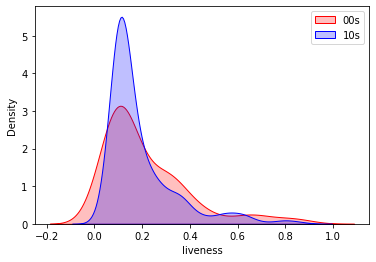

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/rapfinal.csv")
per1 = "00s"
per2 = "10s"
feature = "liveness"
df1 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
df2 = df[(df["year"] >= 2010) & (df["year"] < 2020)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since the p value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Liveness is pretty much the same throughout.
*********************************

Hypothesis Test: We'd like to know whether rap songs from 90s and 00s differ by danceability

**Null Hypothesis ($H_0$)**: The danceability of rap songs from two periods are equal

$ H_0: \mu_{90s} = \mu_{00s}$

**Alternative Hypothesis ($H_A$)**: The danceability of rap songs from 90s is less than that of the ones from 00s 

$ H_A:\mu_{00s} < \mu_{90s}$

**Significance level**: 0.05

Ttest_indResult(statistic=3.7296554065896625, pvalue=0.00025288783459488905)

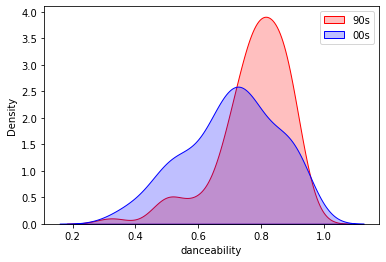

In [ ]:
df = pd.read_csv("./drive/My Drive/Merged Datasets/rapfinal.csv")
per1 = "90s"
per2 = "00s"
feature = "danceability"
df1 = df[(df["year"] >= 1990) & (df["year"] < 2000)][feature]
df2 = df[(df["year"] >= 2000) & (df["year"] < 2010)][feature]
sns.kdeplot(df1, shade=True, label=per1, color="r")
sns.kdeplot(df2, shade=True, label=per2, color="b")
plt.legend()
stats.ttest_ind(df1, df2, equal_var=False)

Since the p value is less than the significance level of 0.05, we reject the null hypothesis. Danceability of 90s is higher.
*********************************

# Overall Interpretation and Conclusions
Following our exploratory data analysis, we derived five major genres based on their popularity ranking. We promptly set out to test our hypotheses formulated after the exploratory data analysis.

Before diving into these five genres we must first reiterate our results from the "How features affect the popularity" section. By our Z-test analysis we found out that most popular songs had higher energy, liveness and danceability values compared to the average. An interesting result from our analysis was the fact that the most popular songs had smaller acousticness values compared to the average which could be explained by the rise of rap, hip hop and electronic genres. Last but not least our popularity analysis has shown that the speechiness of popular songs were not different than the average which meant that the amount of lyrics in a popular song did not differ much from an ordinary song of same duration. 

Pop songs were tested for changes in danceability and liveness. After the tests, we found that new pop songs have lower mean danceability and a relatively constant mean liveness(that has remained low consistently).

Rock songs were tested for changes in their loudness and energy features. Both of these features were confirmed to have risen in time with a noticeable increase in their means. The 2000's rock songs are without doubt more energetic and loud than past rock songs.

Hip hop, as the third major genre of analysis in our project, was tested for changes in its tempo and danceability. Tempo was found to have been consistent(centered around 90 bpm) throughout time. Meanwhile danceability of hip hop songs was found to have declined slightly, resulting in a lower mean for the more recent hip hop songs.

Pop rap songs of 90s clearly has a greater valence compared to the songs of 00s. This might come from the fact that more melancholic and emotional songs were written in pop-like genres in recent times compared to the 90s. The tempo analysis shows that the tempo hasn't changed that much from 00s and 10s for the pop rap genre.

Last but not least for the rap genre we found that the liveness value did not change much from 00s to 10s. However, the danceability of 90s is clearly greater than the danceability of 00s. A plausible reason for this might be the fact that when rap first came out it was closer to hip hop than it is today so it is reasonable to assume that 90s has a higher danceability value.

The assessment of metrics for each of the five genres will potentially let us differentiate between users of older tastes or newer tastes, thus recommending songs according to the documented cases of user preference with greater reliability.

# Part 3: Machine Learning

##Song Popularity Prediction

###Linear Regression

In [ ]:
def linear_regression(x, y, m=0, b=0, epochs=10000, learning_rate=0.1):
  N = float(len(y))
  for i in range(epochs):
      y_pred = (m * x) + b
      loss = sum([data**2 for data in (y - y_pred)]) / N
      derv_m = (-2/N) * sum(x * (y - y_pred))
      derv_b = (-2/N) * sum(y - y_pred)
      m = m - (learning_rate * derv_m)
      b = b - (learning_rate * derv_b)
      #print(m, b, loss)
  return m, b, loss


We chose liveness for our x values because it was the feature which showed the best linear relationship, in relation with popularity.

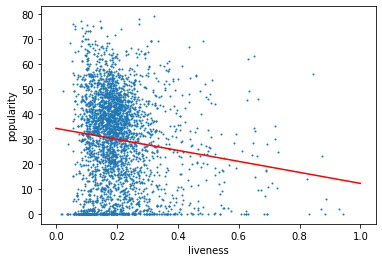

In [ ]:
df = pd.read_csv("./drive/My Drive/data_by_genres.csv")
x = np.linspace(0, 1)
y = np.linspace(0, 100)
plt.scatter(x = "liveness", y = "popularity", data = df, s= 1)
plt.xlabel("liveness")
plt.ylabel("popularity")
plt.plot(x, (-22)*x+34.20, c = "r")
plt.show()

In [ ]:
linear_regression(df["liveness"], df["popularity"])

(-22.066467974498803, 34.203388422422094, 333.8133916579436)

From the code above we learn that the linear regression model yields a line y = -22.066x + 34.203

Notice the fact that the loss rate is really high, let's check the R^2 value

In [ ]:
from scipy import stats
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

In [ ]:
print(rsquared(df["liveness"], df["popularity"]))

0.01536307451372758


The R^2 value is much smaller than 1 therefore linear regression is not a good model for this type of prediction.

###Decision Tree

In [ ]:
# importing Kmeans
from sklearn.cluster import KMeans
# finding the distances between centroid and data points
from scipy.spatial import distance
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
for row in range(df.shape[0]):
  if df.iloc[row, 13] < 10:
    df.iloc[row, 13] = 0
  elif df.iloc[row, 13] < 20:
    df.iloc[row, 13] = 1
  elif df.iloc[row, 13] < 40:
    df.iloc[row, 13] = 2
  elif df.iloc[row, 13] < 80:
    df.iloc[row, 13] = 3
y = df["popularity"]
df = df.drop("popularity", axis=1)
df = df.drop("name", axis=1)
df = df.drop("id", axis=1)
df = df.drop("release_date", axis=1)
df = df.drop("year", axis=1)
x = df.drop("artists", axis=1)


X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)


model = DecisionTreeClassifier(max_depth=3, criterion="entropy")
# train the mode
model.fit(X_train, y_train)
# the required utility function


# execute and print the ouput
print(export_text(model, feature_names=list(x.columns)))

|--- acousticness <= 0.89
|   |--- speechiness <= 0.68
|   |   |--- instrumentalness <= 0.20
|   |   |   |--- class: 3
|   |   |--- instrumentalness >  0.20
|   |   |   |--- class: 0
|   |--- speechiness >  0.68
|   |   |--- energy <= 0.30
|   |   |   |--- class: 0
|   |   |--- energy >  0.30
|   |   |   |--- class: 0
|--- acousticness >  0.89
|   |--- acousticness <= 0.98
|   |   |--- speechiness <= 0.04
|   |   |   |--- class: 0
|   |   |--- speechiness >  0.04
|   |   |   |--- class: 0
|   |--- acousticness >  0.98
|   |   |--- valence <= 0.36
|   |   |   |--- class: 0
|   |   |--- valence >  0.36
|   |   |   |--- class: 0



In this decision tree, class 0 represents low popularity songs whereas class 3 represents the most popular songs. Notice here the fact that our model separates the high popularity songs from the rest by acousticness, speechiness and instrumentalness features. These features will be important in our next models.

In [ ]:
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
accuracies

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.49503638, 0.49630851, 0.49541252, 0.49681026, 0.49630851])

49% accuracy rate again yields a bad model so we have to look for alternatives.

###Random Forest

Random Forest models are supposed to yield a more accurate model than a single decision tree. Let's look at its accuracy rate to decide whether to use it for prediction or not.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
df = pd.read_csv("./drive/My Drive/data.csv")
for row in range(df.shape[0]):
  if df.iloc[row, 13] < 10:
    df.iloc[row, 13] = 0
  elif df.iloc[row, 13] < 20:
    df.iloc[row, 13] = 1
  elif df.iloc[row, 13] < 40:
    df.iloc[row, 13] = 2
  elif df.iloc[row, 13] < 80:
    df.iloc[row, 13] = 3
y = df["popularity"]
df = df.drop("popularity", axis=1)
df = df.drop("name", axis=1)
df = df.drop("id", axis=1)
df = df.drop("release_date", axis=1)
df = df.drop("year", axis=1)
x = df.drop("artists", axis=1)
X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:"+str(rf_acc))

Random Forest Accuracy:0.6110442112506451


Indeed the random forest model yields a more accurate model than a single decision tree but the accuracy rate is still low. Let's look for other models.

###K-nearest Neigbours

In [ ]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsRegressor
## Instantiate the model with 5 neighbors. 
knn = KNeighborsRegressor(n_neighbors=37)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
knn.score(X_test, y_test)

0.89318759732435


This accuracy rate is the highest among the ML models we've used thereby KNN model will be used for prediction but in order to do that we must first tune the hyperparameter K.

####Hyper-parameter Tuning

The features coming from the linear regression model and the decision tree model will be used to predict popularity.

Text(0.5, 1.0, 'Error Rate vs K-value')

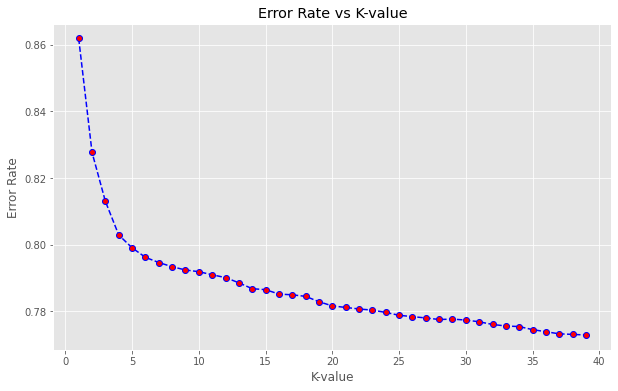

In [ ]:
df = pd.read_csv("./drive/My Drive/data.csv")
y = df["popularity"]
x = df[["liveness", "speechiness", "energy", "instrumentalness"]]
X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)
err_rates = []
for idx in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_val)
    err_rates.append(np.mean(y_val != pred_idx))
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,40), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

Error rate is at its lowest with K = 37 so this will be our hyperparameter value.

In [ ]:
y = df["popularity"]
x = df[["liveness", "speechiness", "energy", "instrumentalness"]]
X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
df = pd.read_csv("./drive/My Drive/data.csv")
def predictor(songname, df, X_train, y_train):
  for row in range(df.shape[0]):
    if df.iloc[row]["name"] == songname:
      knn = KNeighborsRegressor(n_neighbors = 37) #setting up the KNN model to use 5NN
      knn.fit(X_train, y_train) #fitting the KNN
      print(knn.predict([[df.iloc[row]["liveness"],df.iloc[row]["speechiness"],df.iloc[row]["energy"],df.iloc[row]["instrumentalness"]]]))


In [ ]:
print("Popularity prediction for the song Schism is: ")
predictor("Schism", df, X_train, y_train)

Popularity prediction for the song Schism is: 
[28.48648649]


In [ ]:
print("Popularity prediction for the song Da Funk is: ")
predictor("Da Funk", df, X_train, y_train)

Popularity prediction for the song Da Funk is: 
[12.89189189]


In [ ]:
print("Popularity prediction for the song Diamond Eyes is: ")
predictor("Diamond Eyes", df, X_train, y_train)

Popularity prediction for the song Diamond Eyes is: 
[40.56756757]


##Song Recommendation System

This song recommmendation system requires name of the songs as an input. One can enter several songs to be recommended. When there is no more input, system will then recommend songs that are similar to the inputs' liveness, speechiness, energy and instrumentalness values.

In [ ]:
from sklearn.neighbors import KDTree
songlist = []
df = pd.read_csv("./drive/My Drive/data.csv")
x = df[["liveness", "speechiness", "energy", "instrumentalness"]]
song = input("Please enter the name of the songs (Press enter to finish): ")
while song != "":
  songlist.append(song)
  song = input("Please enter the name of the songs (Press enter to finish): ")
df2 = pd.DataFrame(columns = df.columns)
for item in songlist:
  for row in range(df.shape[0]):
    if df.iloc[row]["name"] == item:
      df2 = df2.append(df.iloc[row,:])
tree = KDTree(x)
dist, ind = tree.query([[df2["liveness"].mean(), df2["speechiness"].mean(),df2["energy"].mean(),df2["instrumentalness"].mean()]], k=5)
for num in ind:
  print(df.iloc[num]["name"])

Please enter the name of the songs (Press enter to finish): Disposable Heroes
Please enter the name of the songs (Press enter to finish): Leper Messiah
Please enter the name of the songs (Press enter to finish): Fuel
Please enter the name of the songs (Press enter to finish): Bad Seed
Please enter the name of the songs (Press enter to finish): Prince Charming
Please enter the name of the songs (Press enter to finish): 
148604                                      Arthur
140447              Must Have Done Something Right
125945               Shinzo wo Sasageyo! - TV Size
119864                                     Indiana
28274     When You Walk In the Room - Mono Version
Name: name, dtype: object
